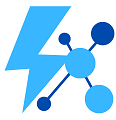 
#  Lab 3 - Gradient Descent - AI Faster 

#### Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import linear_model
import random
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d
from sklearn.linear_model import LinearRegression

### Problem 1

Tìm **global minimum** (cực tiểu của độ thì hàm số) của 2 đồ thị hàm số sau bằng **Gradient Descent** và biểu diễn cách hoạt động của thuật toán (visualization) sau đó vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp):
>Đồ thị hàm parabol: $y = x^{2}$

>Đồ thị hàm trùng phương: $y = x^{4} - 2x^{2} - 3$

In [2]:
# Ve su lien he giua cost va interation de tim diem dung tot
def Draw_cost_iter(x_list):
    cost_list = []
    iter_list = []
    for i in range(len(x_list)):
        iter_list.append(i)
        cost_list.append(cost(x_list[i]))

    plt.plot(iter_list, cost_list)
    plt.xlabel('Interation')
    plt.ylabel('Cost')
    plt.show()

Nhập learning rate (gợi ý: nhỏ: < 0.1 | trung bình: 0.1 -> 0.3 | lớn: >= 0.6): 0.1


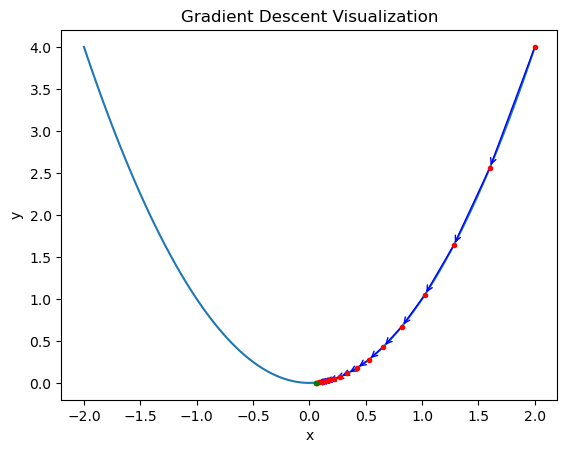

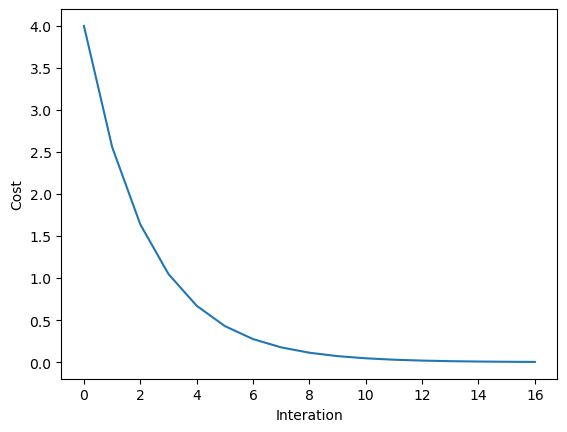

In [3]:
# Code ở đây cũng được
#Đồ thị 1

def cost(x): # Solve f(x)
    return x*x
def grad(x): # Solve f'(x)
    return 2*x
def gradient_descent(x_start, learning_rate, num_iterations): # Solve Gradient descent
    x_history = []
    y_history = []
    x = x_start
    x_history.append(x)
    y_history.append(cost(x))
    for i in range(num_iterations):
        gradient = grad(x)
        x -= learning_rate * gradient
        if(grad(x) < 0.1):
            break
        y = cost(x)
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history



# Vẽ đồ thị
def Draw():
    # Thực hiện gradient descent
    
    x_start = 2
    learning_rate = 0.1
    learning_rate = float(input("Nhập learning rate (gợi ý: nhỏ: < 0.1 | trung bình: 0.1 -> 0.3 | lớn: >= 0.6): "))
    num_iterations = 100
    x_history, y_history = gradient_descent(x_start, learning_rate, num_iterations)

    # Vẽ hàm cost
    x = np.linspace(-2, 2, 1000)
    y = cost(x)
    plt.plot(x, y)
    
    # Vẽ mũi tên cho hướng gradient descent
    for i in range(len(x_history)-1):
        dx = x_history[i+1] - x_history[i]
        dy = y_history[i+1] - y_history[i]
        plt.annotate("", xy=(x_history[i+1], y_history[i+1]), xytext=(x_history[i], y_history[i]), arrowprops=dict(arrowstyle='->', color='blue'))
    plt.scatter(x_history, y_history, color='red', marker='.', linestyle='-', linewidth=1, zorder=10)
    plt.scatter(x_history[-1], y_history[-1], color='green', label='Global Minimum', linewidth = 1, zorder = 20, marker = '.')
    
    # Đặt tên cho trục và đồ thị
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Visualization')
    
    # Show
    plt.show()
    Draw_cost_iter(x_history)
Draw()

Nhập learning rate (gợi ý: value <= 0.1): 0.1


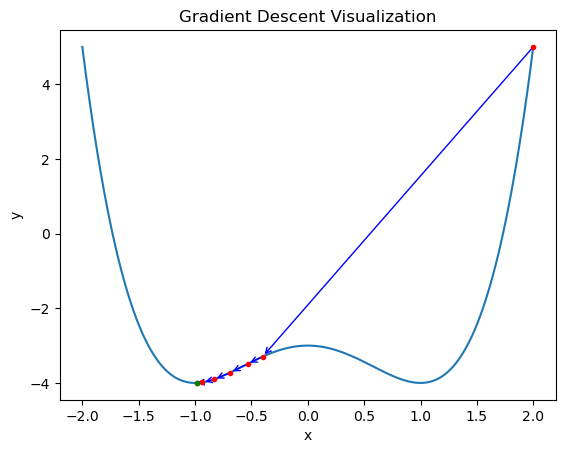

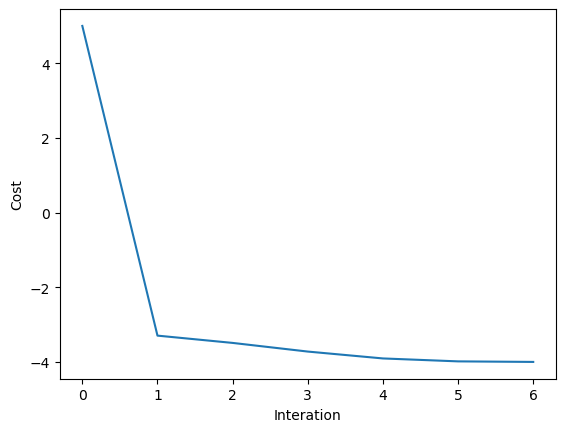

In [4]:
#Đồ thị 2

def cost(x): # Solve f(x)
    return x**4 - 2*(x**2) - 3
def grad(x): # Solve f'(x)
    return 4*(x**3) - 4*x
def gradient_descent(x_start, learning_rate, num_iterations): # Solve Gradient descent
    x_history = []
    y_history = []
    x = x_start
    x_history.append(x)
    y_history.append(cost(x))
    for i in range(num_iterations):
        gradient = grad(x)
        x -= learning_rate * gradient
        if(grad(x) < 0.1):
            break
        y = cost(x)
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history



# Vẽ đồ thị
def Draw():
    # Thực hiện gradient descent
    
    x_start = 2
    learning_rate = 0.1
    learning_rate = float(input("Nhập learning rate (gợi ý: value <= 0.1): "))
    num_iterations = 100
    x_history, y_history = gradient_descent(x_start, learning_rate, num_iterations)

    # Vẽ hàm cost
    x = np.linspace(-2, 2, 1000)
    y = cost(x)
    plt.plot(x, y)
    
    # Vẽ mũi tên cho hướng gradient descent
    for i in range(len(x_history)-1):
        dx = x_history[i+1] - x_history[i]
        dy = y_history[i+1] - y_history[i]
        plt.annotate("", xy=(x_history[i+1], y_history[i+1]), xytext=(x_history[i], y_history[i]), arrowprops=dict(arrowstyle='->', color='blue'))
    plt.scatter(x_history, y_history, color='red', marker='.', linestyle='-', linewidth=1, zorder=10)
    plt.scatter(x_history[-1], y_history[-1], color='green', label='Global Minimum', linewidth = 1, zorder = 20, marker = '.')
    
    # Đặt tên cho trục và đồ thị
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Visualization')
    
    # Show
    plt.show()
    Draw_cost_iter(x_history)
Draw()

### Problem 2

Từ dữ liệu file *Data_female.txt* bạn hãy dùng **Gradient Descent** để dự đoán cân nặng dựa vào chiều cao, và trực quan hóa sau đó vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp)

In [5]:
# Code ở đây cũng được
df = pd.read_csv("Data_female.txt", sep="\t")
df

,Chiều cao,Cân nặng
0,74.0cm,12.9kg
1,80.7cm,10.2kg
2,86.4cm,9.5kg
3,90.7cm,16.7kg
4,95.7cm,16.9kg
5,99.0cm,13.0kg
6,102.7cm,15.100000000000001kg
7,106.2cm,20.2kg
8,109.4cm,15.2kg
9,112.2cm,18.1kg


In [6]:
df['Chiều cao'] = df['Chiều cao'].apply(lambda x: float(x.replace('cm', '')))
df['Cân nặng'] = df['Cân nặng'].apply(lambda x: float(x.replace('kg', '')))
df

,Chiều cao,Cân nặng
0,74.0,12.9
1,80.7,10.2
2,86.4,9.5
3,90.7,16.7
4,95.7,16.9
5,99.0,13.0
6,102.7,15.1
7,106.2,20.2
8,109.4,15.2
9,112.2,18.1


<IPython.core.display.Javascript object>


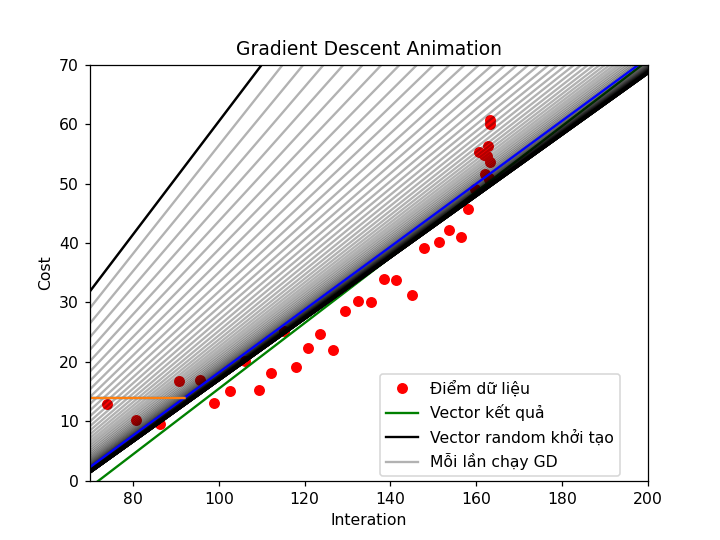

[-39.81602278] [[0.55282316]]
Nhập learning rate (0.000005): 0.000005


In [8]:
%matplotlib notebook
def cost(x):
    m = A.shape[0]
    return 0.5/m * np.linalg.norm(A.dot(x) - b, 2)**2

def grad(x):
    m = A.shape[0]
    return 1/m * A.T.dot(A.dot(x)-b)

def check_grad(x):
    eps = 1e-4
    g = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        g[i] = (cost(x1) - cost(x2)) / (2*eps) # Cong thuc f'(x) = (f(x + eps) - f(x - eps)) / 2eps
    g_grad = grad(x)
    if np.linalg.norm(g - g_grad) > 1e-7:
        print("Warning: Check gradient function!")



def gradient_descent(x_init, learning_rate, iteration):
    x_list = [x_init]
    m = A.shape[0]

    for i in range(iteration):
        x_new = x_list[-1] - learning_rate*grad(x_list[-1])

        if np.linalg.norm(grad(x_new))/ len(x_new) < 0.5: # when to stop GD
            break
        x_list.append(x_new)

    return x_list


# Data


A = np.array([df['Chiều cao']]).T
b = np.array([df['Cân nặng']]).T

# Visual data
fig1 = plt.figure("Gradient Descent for Linear Regression")
ax = plt.axes(xlim = (70, 200), ylim = (0, 70))
plt.plot(A, b, 'ro')

# Visual line Linear Regression
LR = linear_model.LinearRegression()
LR.fit(A, b)

x0_gd = np.linspace(70, 200, 2)
y0_sklearn = LR.intercept_[0] + LR.coef_[0][0] * x0_gd

plt.plot(x0_gd, y0_sklearn, color = 'green')
print(LR.intercept_, LR.coef_)

# Add one to A
ones = np.ones((A.shape[0],1), dtype=np.int8)
A = np.concatenate((ones,A), axis=1)

# Random initial line
x_init = np.array([[float(LR.intercept_[0]) + 5], [float(LR.coef_[0][0]) + 0.4]])
y0_init = x_init[0][0] + x_init[1][0]*x0_gd #b = ax
plt.plot(x0_gd, y0_init, color = "black")


# check_grad(x_init)

# Run gradient descent
iteration = 1000
learning_rate = float(input("Nhập learning rate (0.000005): "))

x_list = gradient_descent(x_init, learning_rate, iteration)

# plot black x_list
for i in range(len(x_list)):
    y0_x_list = x_list[i][0] + x_list[i][1]*x0_gd
    plt.plot(x0_gd, y0_x_list, color='black', alpha = 0.3)

# Draw animation
line , = ax.plot([],[], color = "blue")

def update(i):
    y0_gd = x_list[i][0][0] + x_list[i][1][0]*x0_gd
    line.set_data(x0_gd, y0_gd)
    return line,

iters = np.arange(1,len(x_list), 1)
line_ani = animation.FuncAnimation(fig1, update, iters, interval=50, blit=True)


# legend for plot
plt.legend(('Điểm dữ liệu', 'Vector kết quả', 'Vector random khởi tạo', 'Mỗi lần chạy GD'), loc=(0.52, 0.01))

# title
plt.title("Gradient Descent Animation")


plt.show() #------------------------------------------------
# Ve su lien he giua cost va interation de tim diem dung tot



<IPython.core.display.Javascript object>


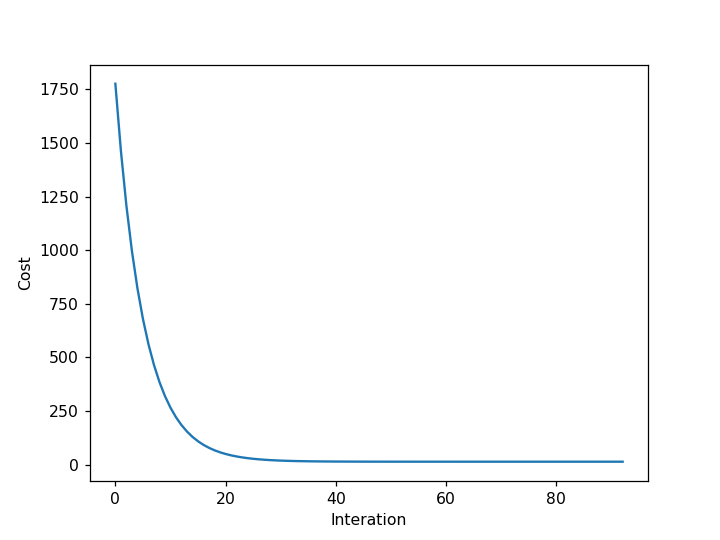

In [11]:
cost_list = []
iter_list = []
for i in range(len(x_list)):
    iter_list.append(i)
    cost_list.append(cost(x_list[i]))
plt.plot(iter_list, cost_list)
plt.xlabel('Interation')
plt.ylabel('Cost')
plt.show()

In [13]:
# Dự đoán
x_predict = float(input("Nhập chiều cao muốn dự đoán: "))
y_predict = x_list[-1][0][0] + x_list[-1][1][0]*x_predict
print(f"Kết quả predict cho {x_predict} là: {y_predict}")

Nhập chiều cao muốn dự đoán: 150
Kết quả predict cho 150.0 là: 42.72263520619865


### Problem 3

Từ 2 list dữ liệu dưới đây hãy vẽ một đường parabol bằng Linear Regression và một đường parabol bằng **Gradient Descent** sau đó dựa đoán label dựa vào data có sẵn và vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp)

> **label** = [2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6]

> **data** = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

<IPython.core.display.Javascript object>


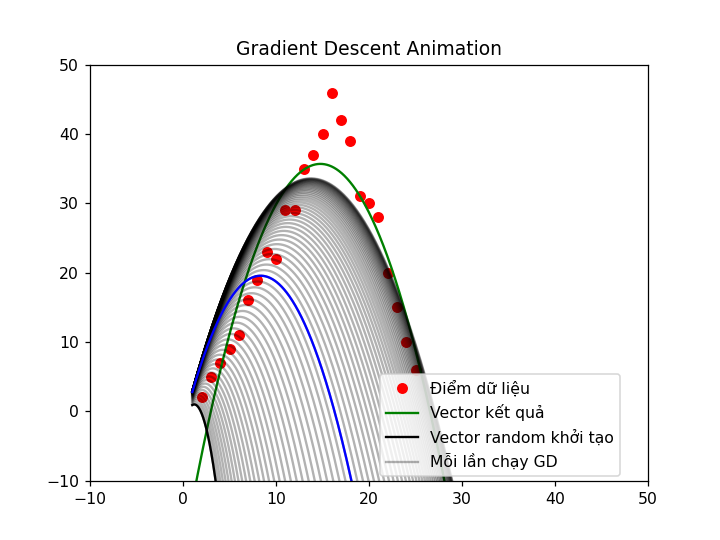

In [14]:
# Code ở đây cũng được
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.animation as animation

def cost(x):
    m = A.shape[0]
    return 0.5/m * np.linalg.norm(A.dot(x) - b, 2)**2

def grad(x):
    m = A.shape[0]
    return 1/m * A.T.dot(A.dot(x)-b)

def check_grad(x):
    eps = 1e-4
    g = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        g[i] = (cost(x1) - cost(x2))/(2*eps)

    g_grad = grad(x)
    if np.linalg.norm(g-g_grad) > 1e-5:
        print("WARNING: CHECK GRADIENT FUNCTION!")

def gradient_descent(x_init, learning_rate, iteration):
    x_list = [x_init]
    m = A.shape[0]

    for i in range(iteration):
        x_new = x_list[-1] - learning_rate*grad(x_list[-1])
        if np.linalg.norm(grad(x_new))/m < 0.5: # when to stop GD
            break
        x_list.append(x_new)

    return x_list

# Data
b = np.array([[2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6]]).T
A = np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]).T

# Draw data
fig1 = plt.figure("GD for Linear Regression")
ax = plt.axes(xlim=(-10,50), ylim=(-10,50)) 
plt.plot(A,b, 'ro')

# Add one to A
ones = np.ones((A.shape[0],1), dtype=np.int8)
A = np.concatenate((ones,A), axis=1)

# append x^2 to A
x_square = np.array([A[:,1]**2]).T
A = np.concatenate((A,x_square), axis=1)

# Draw parabole by formula
x_fomular = np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)
x0_gd = np.linspace(1,46,10000)
y0_fomular = x_fomular[0][0] + x_fomular[1][0] * x0_gd + x_fomular[2][0] * x0_gd * x0_gd
plt.plot(x0_gd, y0_fomular, color='green')


# Random initial line
# x_init = np.array([[ 1.05455731],
#        [ 3],
#        [-0.01216413]])
# x_init = np.array([[ -2.1],
# 			       [ 3.1],
# 			       [-2.1]])
x_init = np.array([[ -2.1],
       [ 5.1],
       [-2.1]])
       
y0_init = x_init[0][0] + x_init[1][0]*x0_gd + x_init[2]*x0_gd*x0_gd
plt.plot(x0_gd,y0_init, color="black")

check_grad(x_init)

# Run gradient descent
iteration = 70
learning_rate = 0.000001

x_list = gradient_descent(x_init, learning_rate, iteration)

# plot black x_list
for i in range(len(x_list)):
    y0_x_list = x_list[i][0] + x_list[i][1]*x0_gd +  x_list[i][2]*x0_gd*x0_gd
    plt.plot(x0_gd, y0_x_list, color='black', alpha = 0.3)

# Draw animation
line , = ax.plot([],[], color = "blue")
def update(i):
    y0_gd = x_list[i][0][0] + x_list[i][1][0]*x0_gd + x_list[i][2][0]*x0_gd*x0_gd
    line.set_data(x0_gd, y0_gd)
    return line,

iters = np.arange(1,len(x_list), 1)
line_ani = animation.FuncAnimation(fig1, update, iters, interval=50, blit=True)

# legend for plot
plt.legend(('Điểm dữ liệu', 'Vector kết quả', 'Vector random khởi tạo', 'Mỗi lần chạy GD'), loc=(0.52, 0.01))


# title
plt.title("Gradient Descent Animation")

plt.show()

In [16]:
# Dự đoán
x_predict = float(input("Nhập dữ liệu muốn dự đoán: "))
y_predict = x_list[-1][0][0] + x_list[-1][1][0]*x_predict + x_list[-1][2][0]*x_predict*x_predict
print(f"Kết quả predict cho {x_predict} là: {y_predict}")

Nhập dữ liệu muốn dự đoán: 30
Kết quả predict cho 30.0 là: -16.24940466032146


### Problem 4

Từ dữ liệu file *Data_GPA_Stanford.txt* bạn hãy dùng **Gradient Descent** để dự đoán Điểm GPA của một sinh viên dựa vào chỉ số IQ và thời gian học trong một ngày của sinh viên đó (Bài này không bắt buộc visualization).

In [2]:
# Code ở đây cũng được
df = pd.read_csv('Data_GPA_Stanford.txt', sep="\t")

In [3]:
df.head()

,IQ,hours per day,GPA
0,97,16,3.08
1,115,14,3.27
2,100,4,2.22
3,91,8,2.35
4,135,13,3.58


In [4]:
df['IQ'] = df['IQ'].apply(lambda x: float(x + random.randint(-5, 5)))
df

,IQ,hours per day,GPA
0,100.0,16,3.08
1,120.0,14,3.27
2,102.0,4,2.22
3,95.0,8,2.35
4,133.0,13,3.58
5,97.0,15,2.95
6,144.0,8,3.29
7,99.0,4,2.24
8,104.0,16,3.22
9,130.0,11,3.23


Text(0.5, 0, 'GPA')

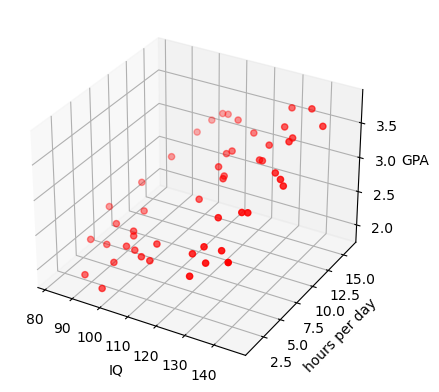

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y = df['GPA']
x1 = df['IQ']
x2 = df['hours per day']

ax.scatter(x1, x2, y, c="r", marker="o")

ax.set_xlabel("IQ")
ax.set_ylabel("hours per day")
ax.set_zlabel("GPA")

In [6]:
dataIQ = np.array([df['IQ']]).T
dataHour = np.array([df['hours per day']]).T
GPA = np.array([df['GPA']]).T

data = np.concatenate((dataIQ, dataHour), axis = 1)
LR = linear_model.LinearRegression()
LR.fit(data, GPA)
IQ, hour = map(float, input("Nhập IQ và hour của sinh viên bạn muốn dự đoán: ").split())
result = round(IQ*LR.coef_[0][0] + hour*LR.coef_[0][1] + LR.intercept_[0], 2)
print(f"Kết quả dự đoán là: {result} GPA")

Nhập IQ và hour của sinh viên bạn muốn dự đoán: 100 10
Kết quả dự đoán là: 2.68 GPA


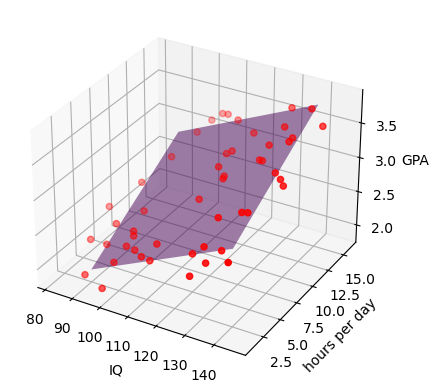

In [7]:

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(dataIQ, dataHour, GPA, c="r", marker="o")

ax.plot_surface(
    np.array([[90, 90], [140, 140]]),
    np.array([[2.5, 15], [2.5, 15]]),
    LR.predict(
        np.array([[90, 90, 140, 140], [2.5, 15, 2.5, 15]]).T
    ).reshape((2, 2)),
    alpha=0.5, cmap='viridis',
)
ax.set_xlabel("IQ")
ax.set_ylabel("hours per day")
ax.set_zlabel("GPA")
plt.show()